In [2]:
import numpy as np
import matplotlib.pyplot as plt

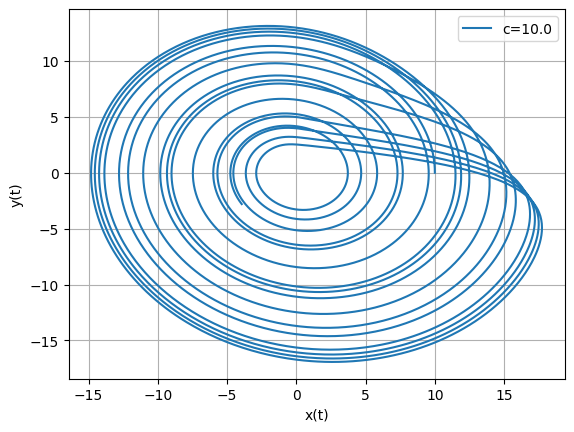

In [5]:
# solving the rossler system

t = np.arange(0, 100 , 0.01)
x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))
x[0] = 2
y[0] = 2
z[0] = 2
a = 0.2
b = 0.2
c = [2.5, 3.5, 4, 5]

def RK4_Rossler(x, y, z, a, b, c):
    h = 0.01
    for i in range(0, len(x)-1):
        k1 = h* (- y[i] - z[i])
        k2 = h* (- y[i] - z[i])
        k3 = h* (- y[i] - z[i])
        k4 = h* (- y[i] - z[i])
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4)/6

        k1_ = h* (x[i] + a*y[i])
        k2_ = h* (x[i] + a*(y[i] + 0.5*k1_))
        k3_ = h* (x[i] + a*(y[i] + 0.5*k2_))
        k4_ = h* (x[i] + a*(y[i] + k3_))
        y[i+1] = y[i] + (k1_ + 2*k2_ + 2*k3_ + k4_)/6

        k1__ = h* (b + z[i] * (x[i] - c))
        k2__ = h* (b + (z[i] + 0.5*k1__) * (x[i] - c))
        k3__ = h* (b + (z[i] + 0.5*k2__) * (x[i] - c))
        k4__ = h* (b + (z[i] + k3__) * (x[i] - c))
        z[i+1] = z[i] + (k1__ + 2*k2__ + 2*k3__ + k4__)/6

    return x, y, z

for i in c:
    xs,ys,zs = RK4_Rossler(x, y, z, a, b, i)
    plt.plot(xs,ys, label=f'c={i:.1f}')
    plt.legend()
    plt.ylabel('y(t)')
    plt.xlabel("x(t)")
    plt.grid(True)


plt.show()

In [24]:
# from scipy.integrate import solve_ivp

# a = 0.2
# b = 0.2
# c_values = [2.5, 3.5, 4, 5]

# def rossler(t, y, a, b, c):
#     x, _y, z = y
#     dxdt = -_y - z
#     dydt = x + a * _y
#     dzdt = b + z * (x - c)
#     return [dxdt, dydt, dzdt]


# def find_maxima(t, y):
#     maxima_indices = (y[:-2] < y[1:-1]) & (y[1:-1] > y[2:])
#     return t[1:-1][maxima_indices], y[1:-1][maxima_indices]


# maxima_counts = []
# for c in c_values:
#     sol = solve_ivp(rossler, [0, 100], [0, 1, 0], args=(a, b, c), dense_output=True)
#     t_maxima, x_maxima = find_maxima(sol.t, sol.y[0])
#     maxima_counts.append(x_maxima)

# for i in range(len(c_values)):
#     plt.plot([c_values[i]]*len(maxima_counts[i]), maxima_counts[i])
# plt.show()

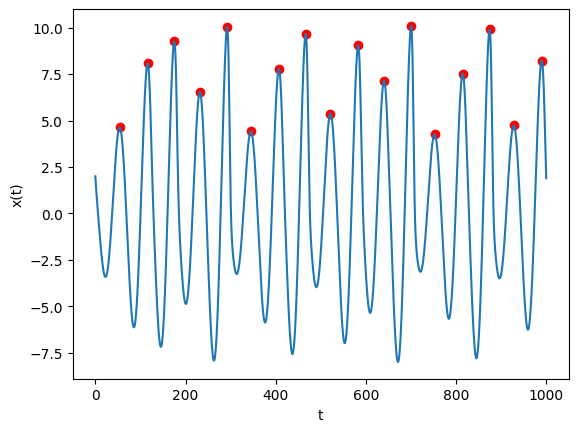

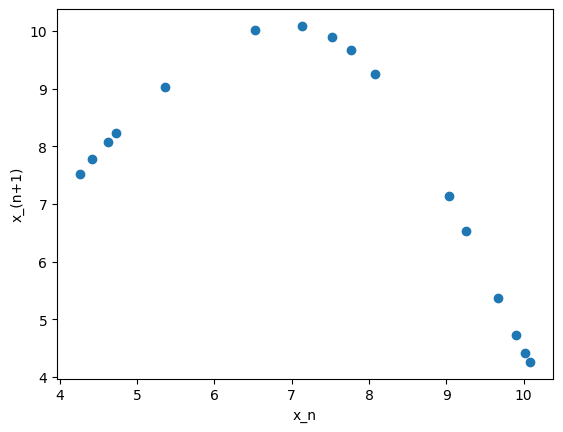

In [25]:
# finding the maxima of x

x5,y5,z5 = RK4_Rossler(x, y, z, 0.2, 0.2, 5)
x_max = []
t_max = []
for i in range(len(z) - 3):
    if x5[i] < x5[i+1] and x5[i+1] > x5[i+2]:
        x_max.append(x5[i+1])
        t_max.append(t[i+1])

plt.scatter(t_max, x_max, color = 'r')
plt.plot(t,x5)
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()

x_n1 = x_max[1:]
x_n = x_max[:len(x_max)-1]
plt.scatter(x_n,x_n1)
plt.ylabel("x_(n+1)")
plt.xlabel("x_n")
plt.show()

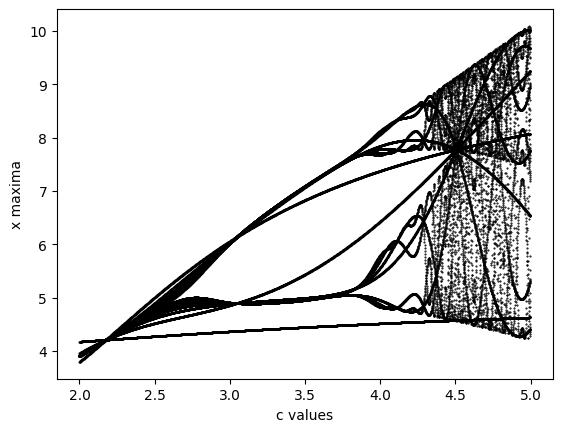

In [30]:
c_vals = np.arange(2, 5, 0.001)
def rossler_diagram(c_vals, RK4_Rossler, x, y, z, a, b):
    max_values = []
    for c in c_vals:
     xs, ys, zs = RK4_Rossler(x, y, z, a, b, c)
     x_o = []
     for i in range(len(xs) - 3):
        if xs[i] < xs[i+1] and xs[i+1] > xs[i+2]:
            x_o.append(xs[i+1])
     max_values.append(x_o)
    return max_values

data = rossler_diagram(c_vals, RK4_Rossler, x, y, z, a, b)
for i in range(len(c_vals)):
    plt.plot([c_vals[i]]*len(data[i]), data[i], 'k.', markersize=1)
plt.ylabel("x maxima")
plt.xlabel("c values")
plt.show()